In [1]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [5]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


# Scale the dataset

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

sc.fit(df_FaultFree.iloc[:,3:])


StandardScaler()

# Select a subset of the Entire Dataset

In [7]:
# Select a subset of the data from simulation runs 1 to 10, and filter out fault numbers 9 and 15
reduced_data = DF.loc[(DF['simulationRun'] >= 1) & (DF['simulationRun'] <= 10)]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

# Apply scaling transformation to selected features of the filtered dataset
X = sc.transform(reduced_data[reduced_data['sample'] > 20].iloc[:, 3:])

# Extract the fault numbers that occur after the 20th sample
Y = reduced_data[reduced_data['sample'] > 20]['faultNumber'].values

# Add a random number coloumn to X as a control feature

In [8]:
control_col = np.random.random(len(X)).reshape(-1,1)
X = np.hstack((X,control_col ))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
x_train.shape

(72960, 53)

# Train the Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
LogRegCls = LogisticRegression(max_iter=1000,random_state=0,multi_class='ovr').fit(x_train, y_train)

In [12]:
LogRegCls.score(x_test,y_test)

0.558826754385965

In [13]:
LogRegCls.coef_.shape

(19, 53)

In [14]:
feature_importance = LogRegCls.coef_
feature_name = np.array(reduced_data.columns[3:])
feature_name = np.append(feature_name, "control_feature")

Coeff_df = pd.DataFrame(data=feature_importance,columns=feature_name)

In [15]:
Coeff_df

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,control_feature
0,0.342892,-0.019409,-0.059207,-0.066406,0.035591,0.000022,-3.136985,0.008882,0.123346,-0.115872,...,-0.512321,-0.166470,-0.140726,0.053724,0.005489,-0.000053,-0.289949,-0.122553,-1.186920,-0.016011
1,0.647829,0.030382,0.012174,-0.402017,-0.192671,-0.367999,-3.494194,-0.338251,0.043520,-0.514204,...,0.062171,-0.165334,-0.266865,0.430292,0.097327,0.072293,-0.674105,-0.129257,-1.709458,-0.074269
2,0.230938,-0.122733,-0.166533,-0.204997,-0.030770,0.188503,-0.635180,-0.197748,0.093296,-0.639959,...,-0.357684,-0.118637,-0.099853,0.616732,0.094963,0.018088,-0.850311,-0.109027,-1.006370,0.078603
3,0.309140,-0.023489,-0.059240,-0.066537,0.033878,-0.015720,-2.748402,0.003103,0.104548,-0.076051,...,-0.478704,-0.168394,-0.126703,0.012110,0.001665,-0.001281,-0.290908,-0.102711,-1.179159,0.068213
4,2.682289,-0.116863,-0.039007,-0.143396,0.044095,0.010765,-3.015419,-0.009529,-0.472117,-0.460501,...,-2.815645,-0.138173,-0.299205,0.380128,0.007493,0.010135,-0.168327,0.683201,-0.704404,-0.032694
5,5.712084,0.132290,0.134679,-0.227185,-0.065013,0.072638,-2.814077,0.212224,0.151485,-1.593799,...,-5.845366,-0.282595,0.069491,1.532454,-0.010892,-0.011508,-0.558822,-0.231788,6.004356,0.255802
6,-1.306473,0.005768,-0.046742,0.122071,0.004806,-0.128788,-0.038282,-0.113046,0.004042,-0.029785,...,1.064197,-0.065533,-0.003429,-0.005066,-0.016070,0.020417,-0.003681,-0.051545,-0.000392,0.002480
7,1.080980,0.130891,0.322986,-0.674220,0.002389,-0.102876,-0.066123,0.227725,0.048460,-0.552419,...,-1.048362,2.163267,-0.044021,0.622098,0.047182,-0.015474,0.174278,-0.061071,-0.064017,-0.006603
8,0.801766,-0.043528,0.036045,-0.018246,0.025928,0.036344,-2.107233,0.227452,0.119996,0.365169,...,-0.871156,-0.166191,0.038052,-0.381388,-0.006534,0.002191,0.287457,-0.117893,-1.596604,-0.066593
9,0.379304,-0.037847,-0.058357,-0.081327,0.044232,-0.012532,-2.964931,-0.005219,0.126265,-0.085195,...,-0.556045,-0.180436,-0.124458,0.023583,0.006110,-0.010827,-0.200220,-0.125514,-1.215627,0.022004


# Feature Imporatnace for each fault type

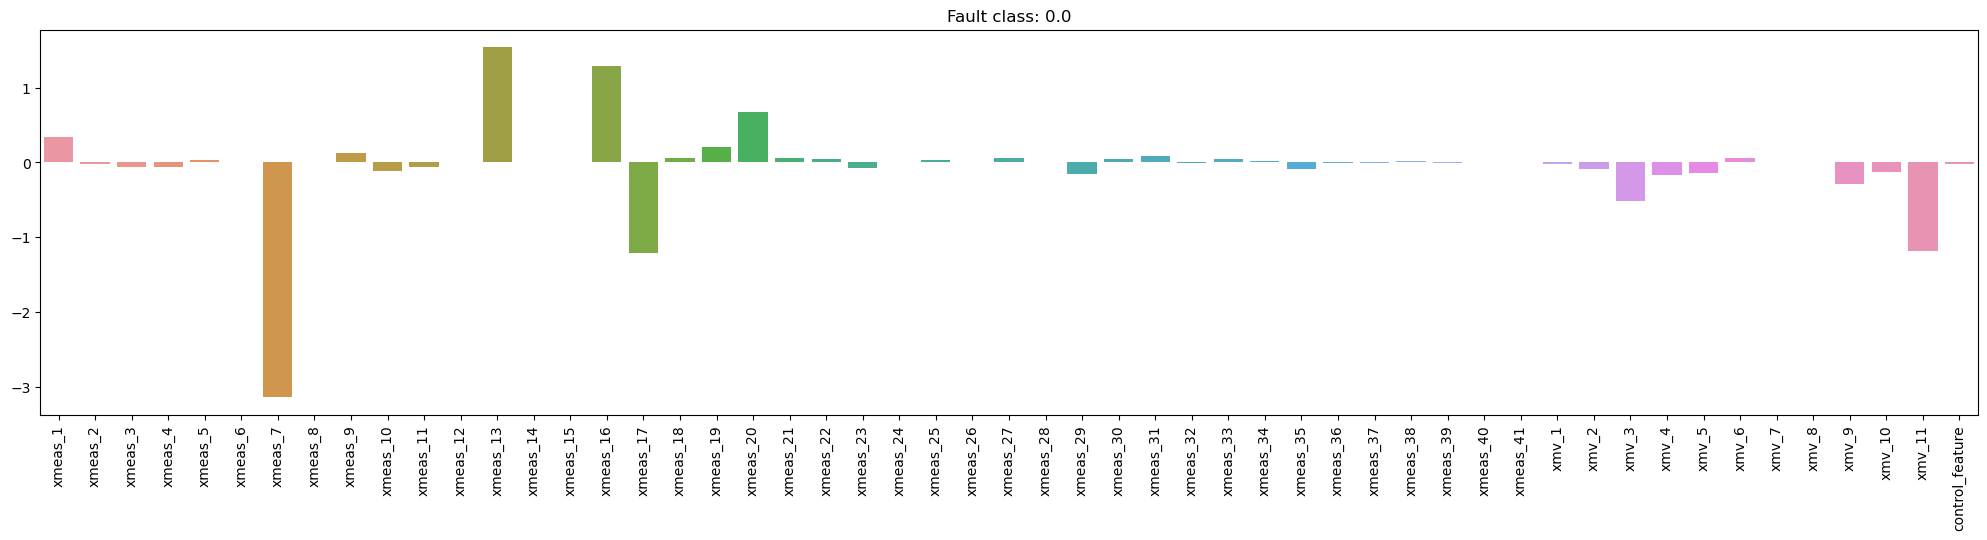

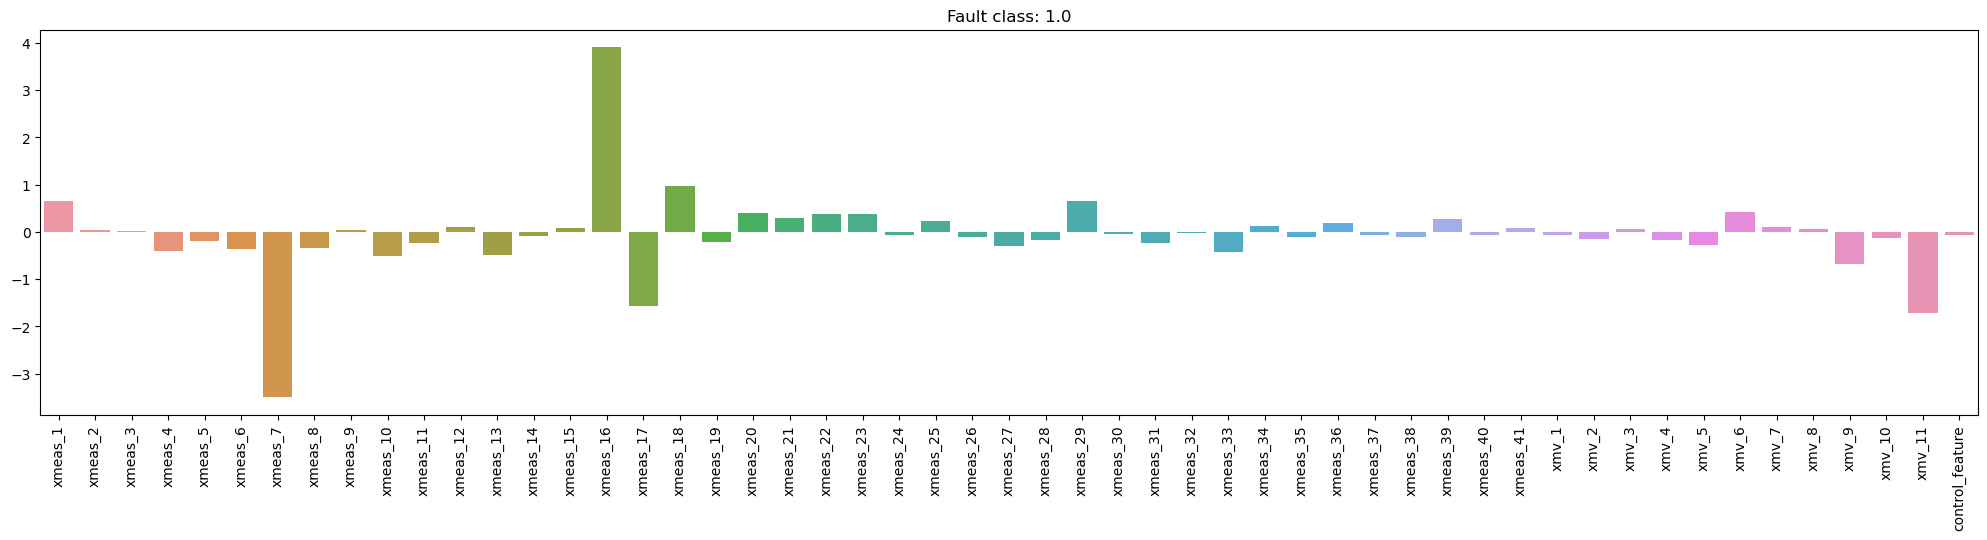

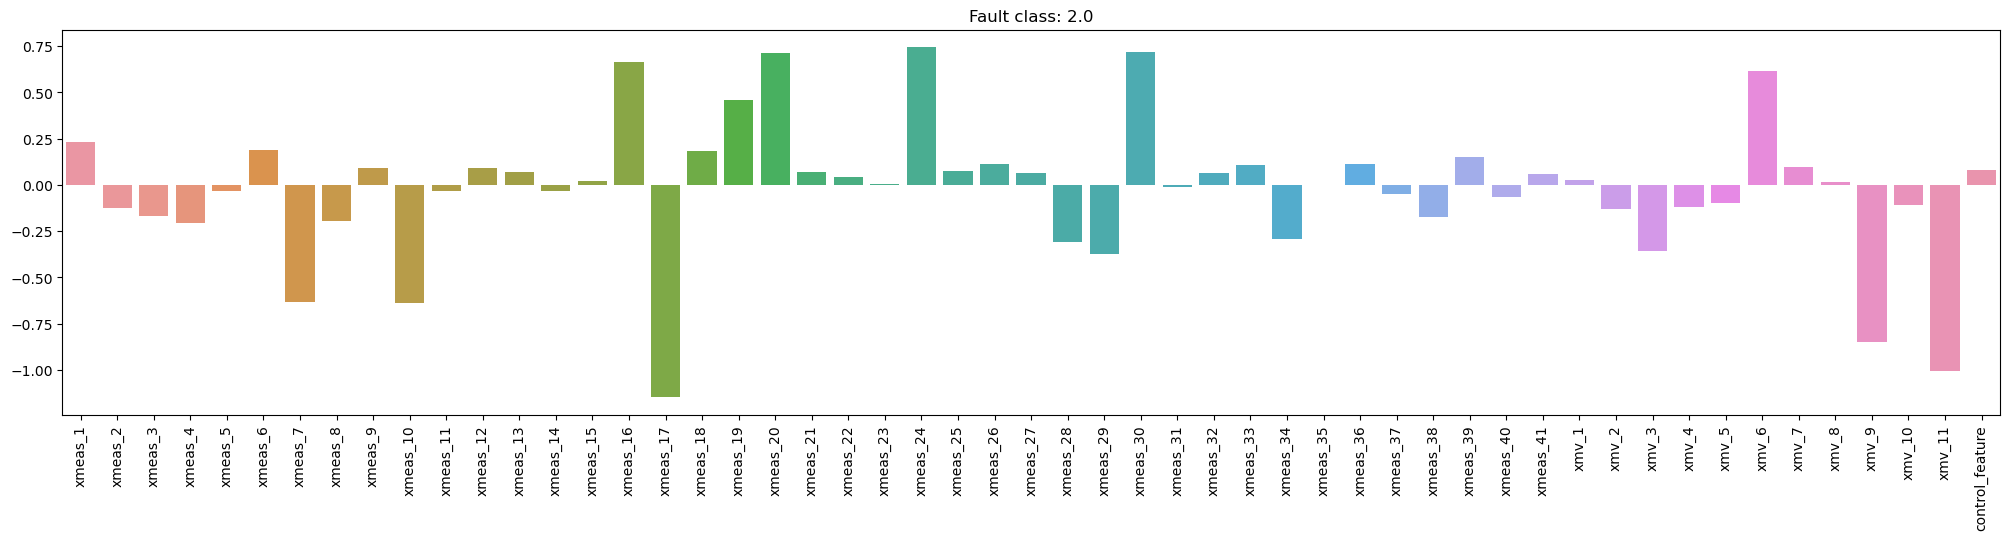

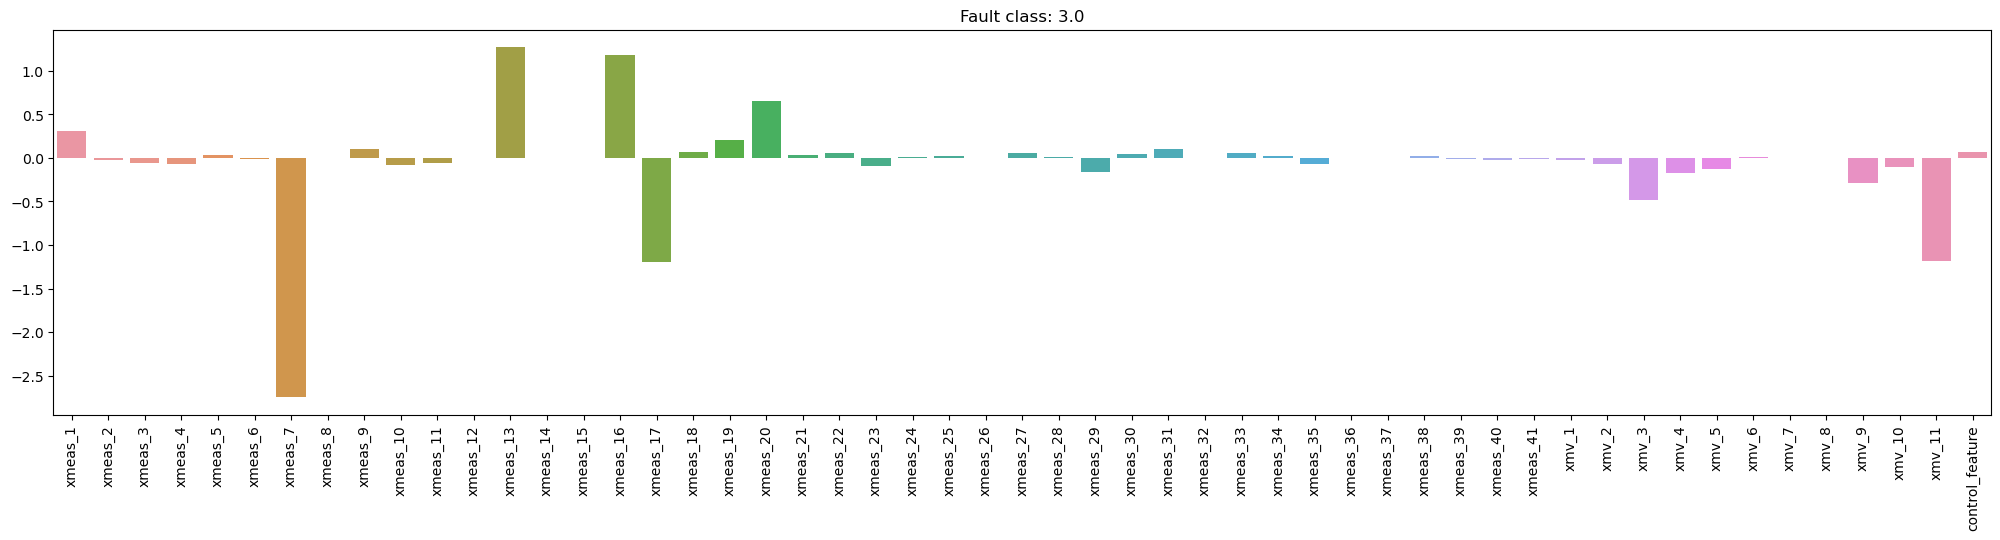

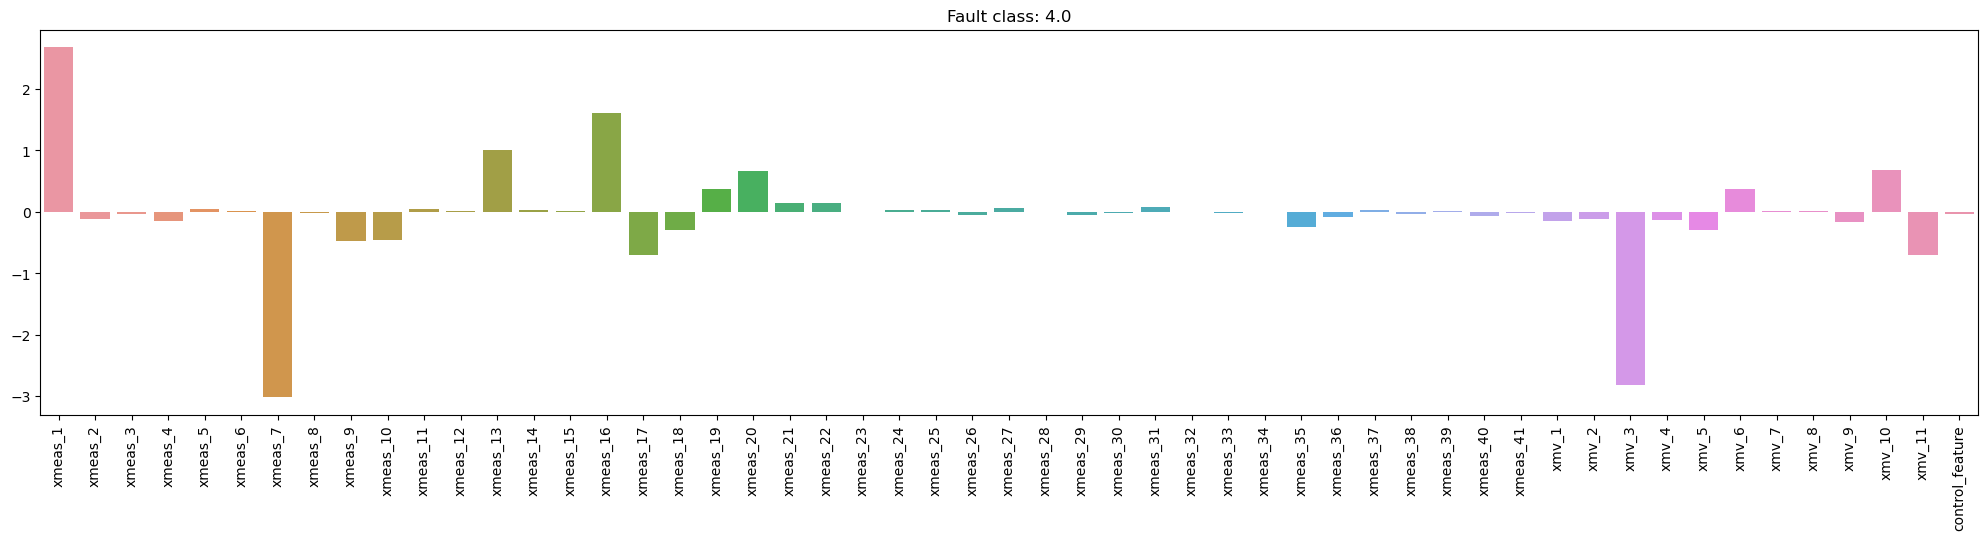

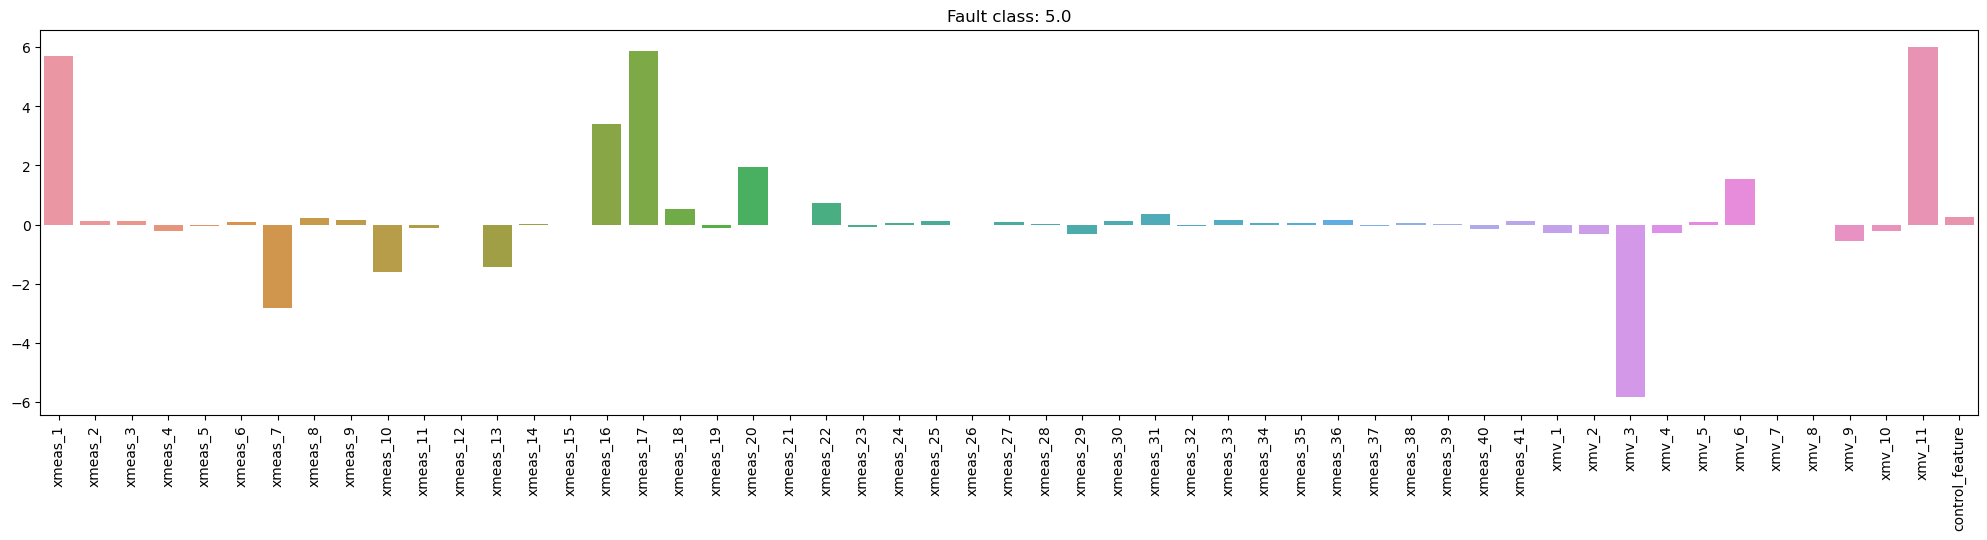

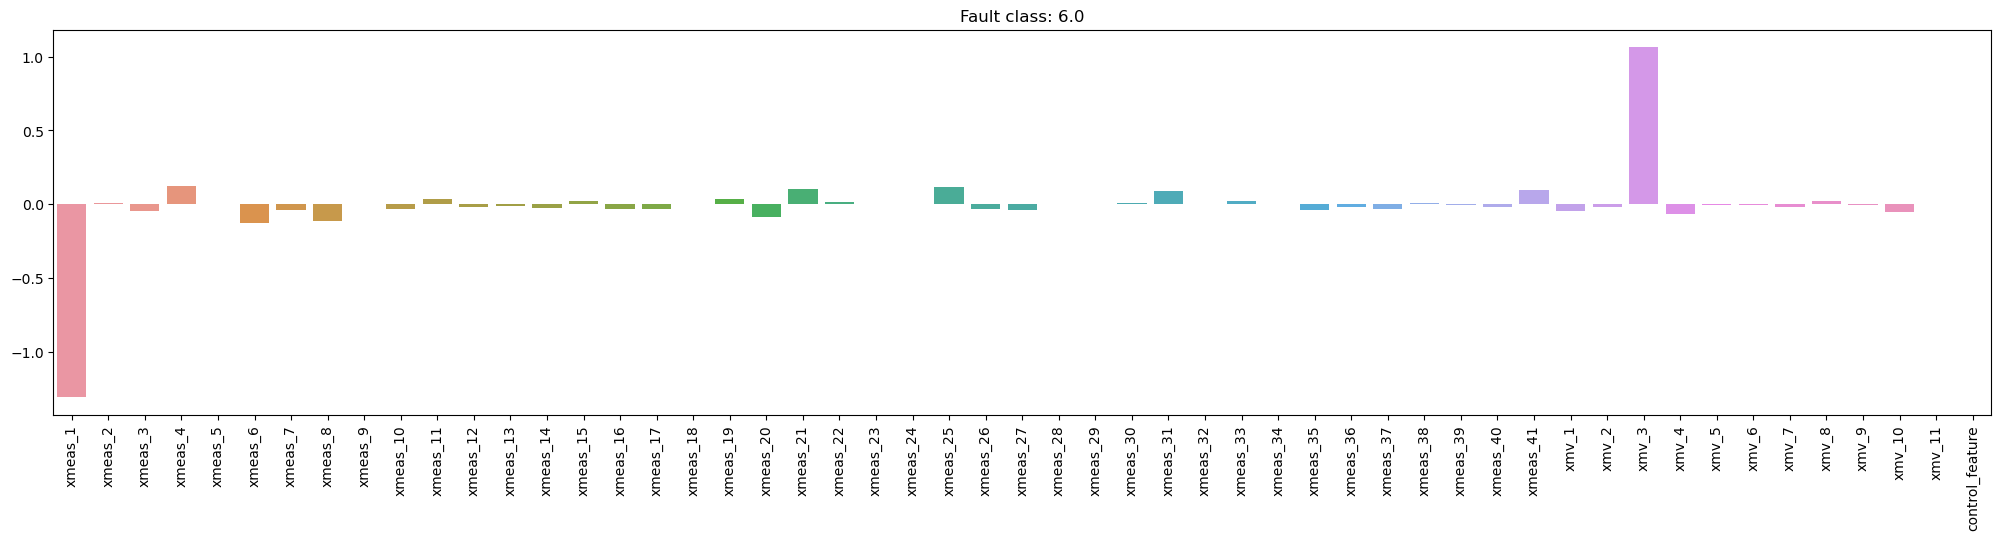

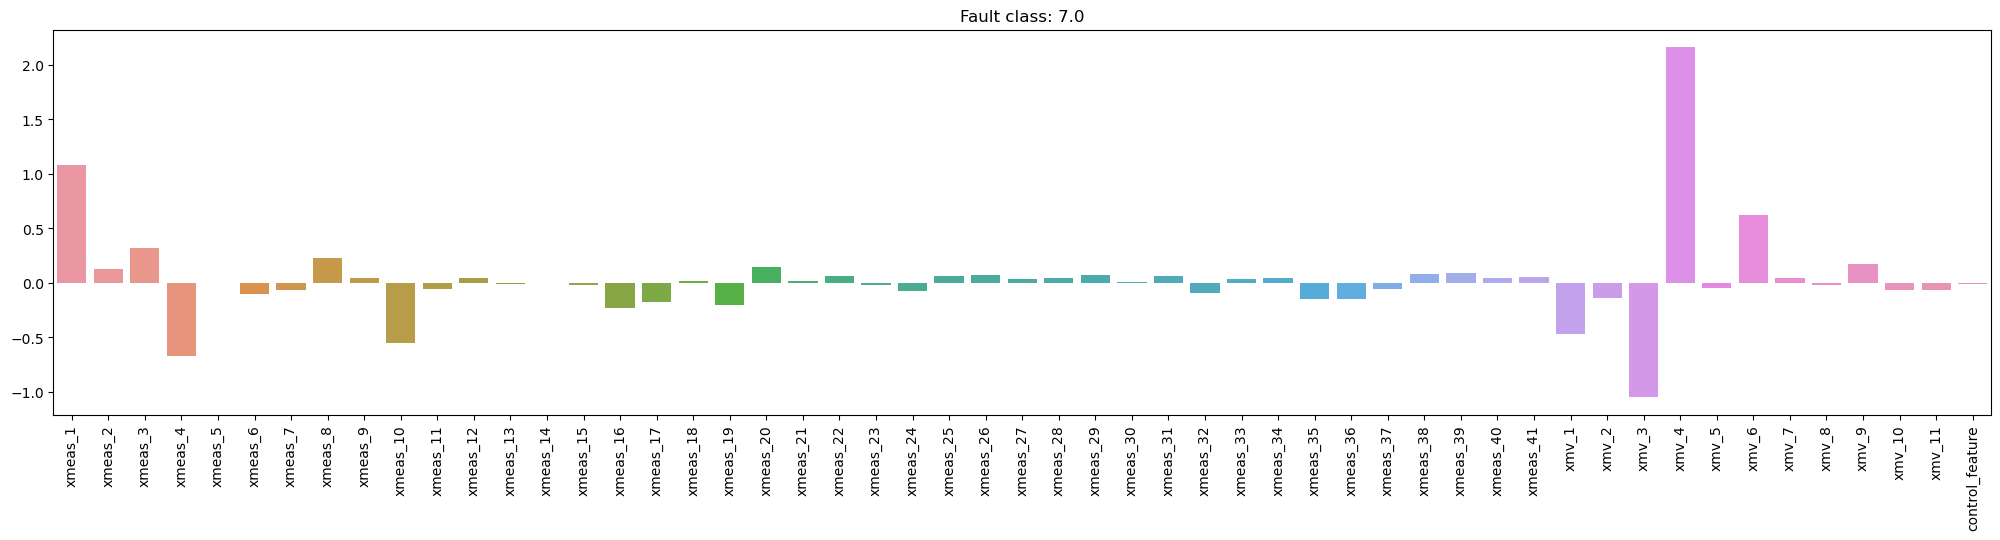

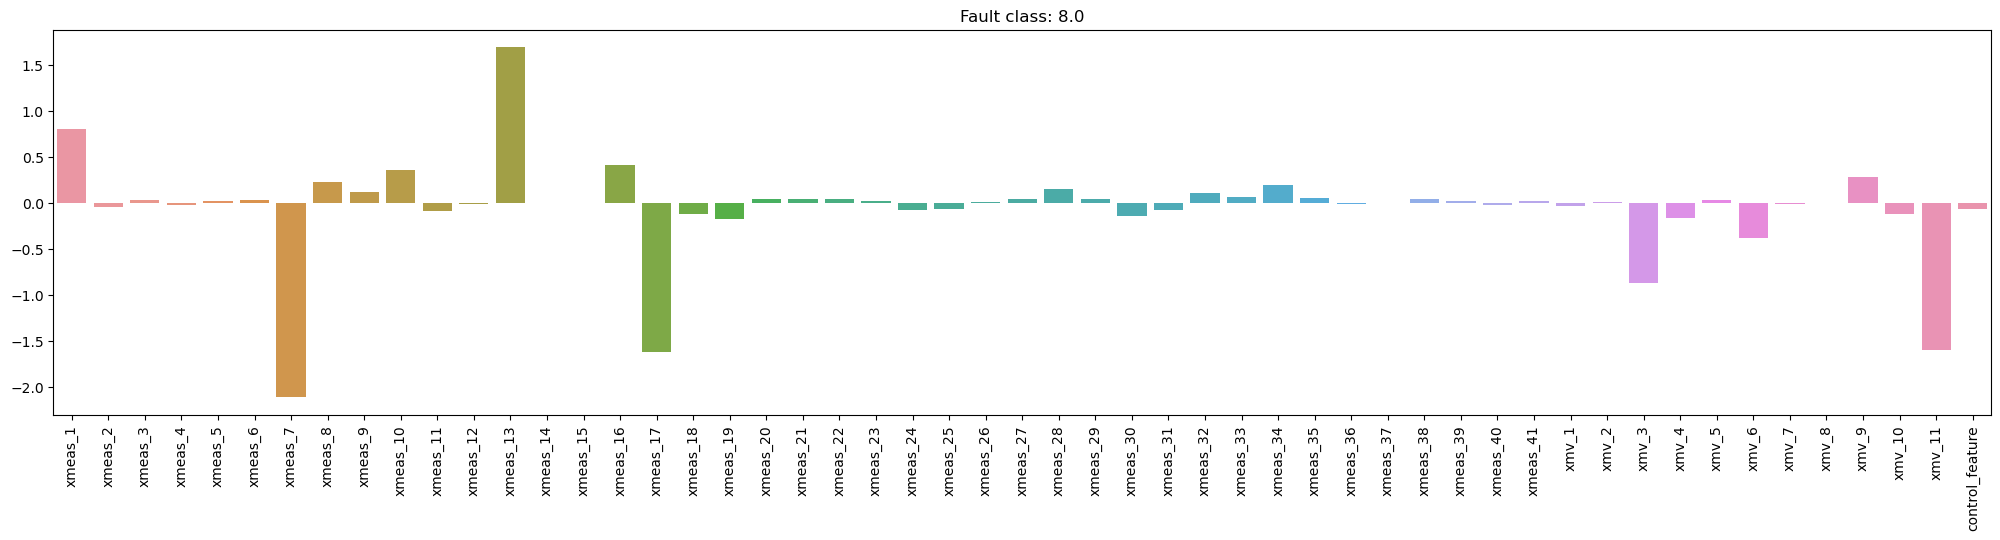

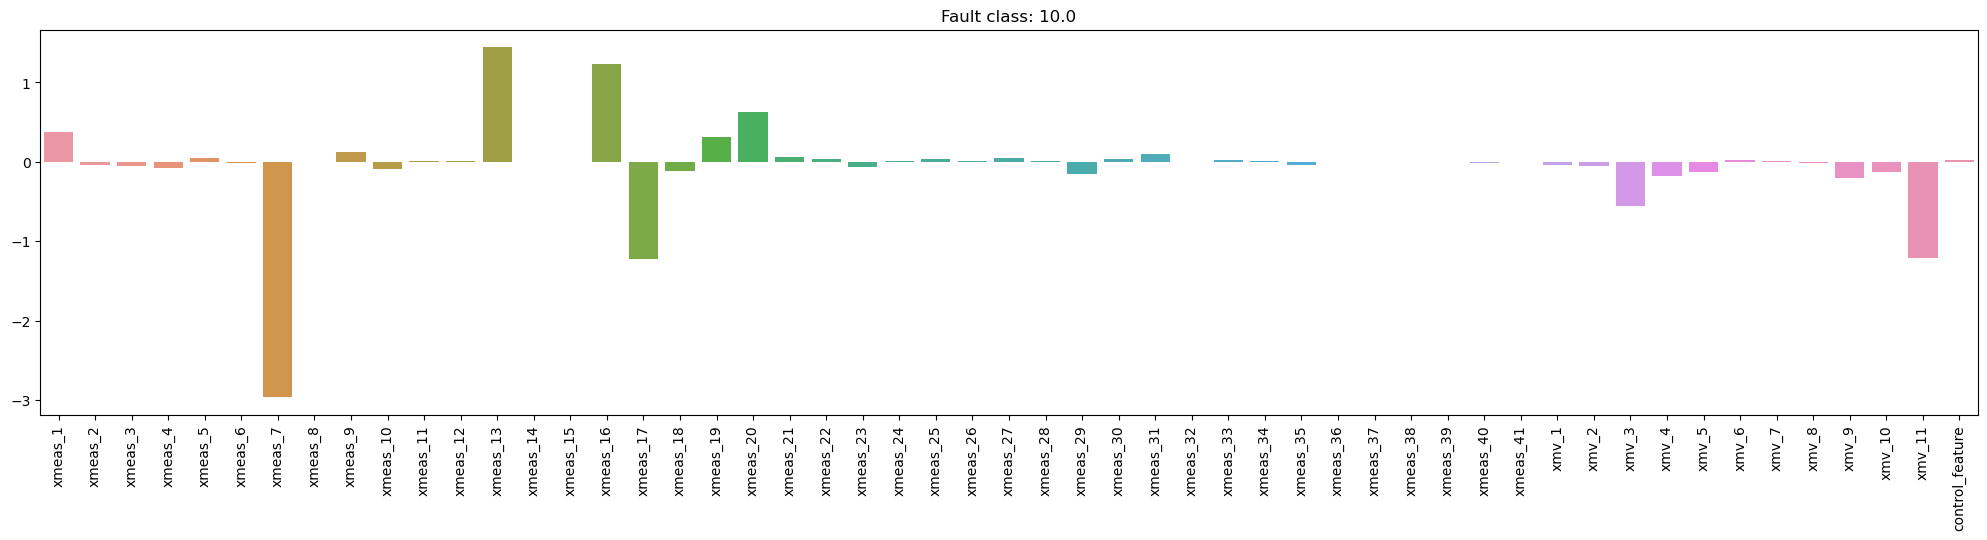

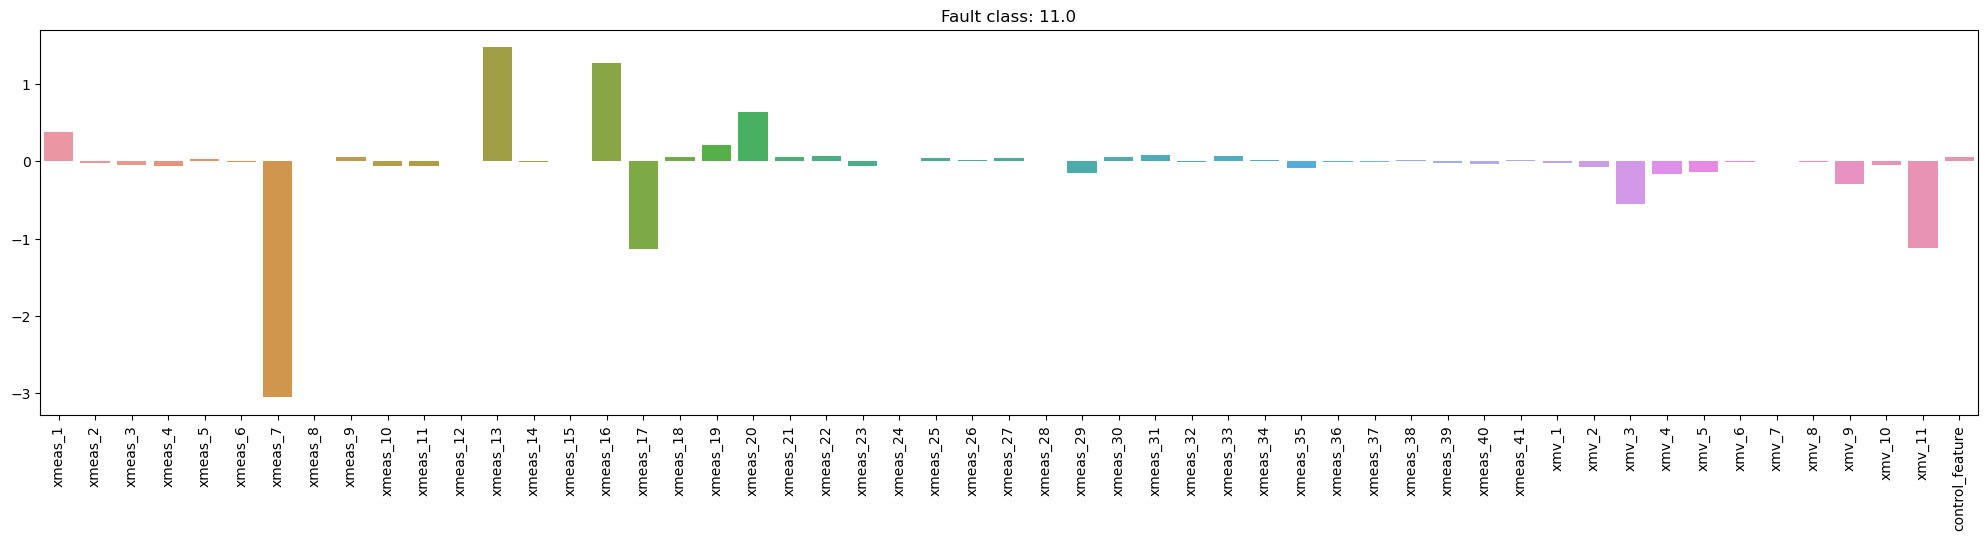

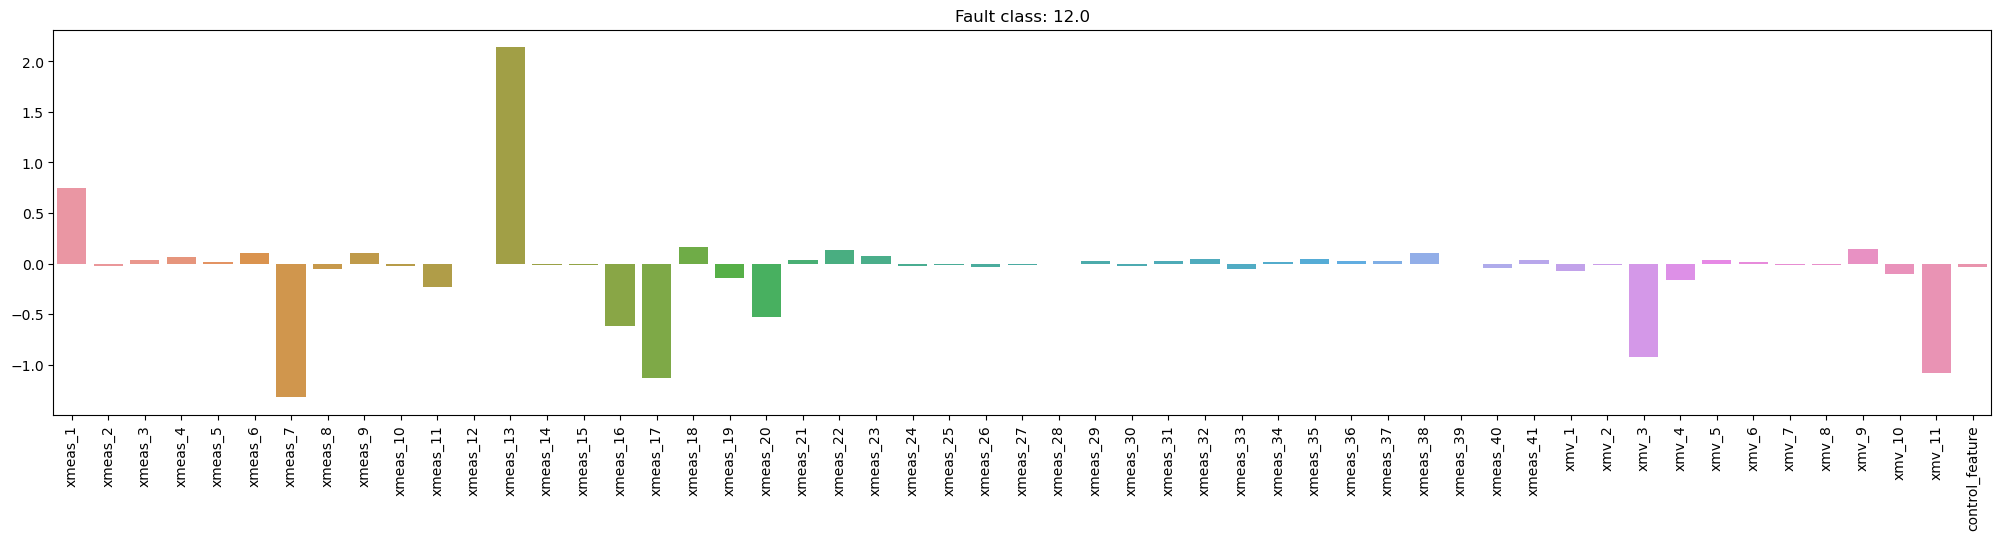

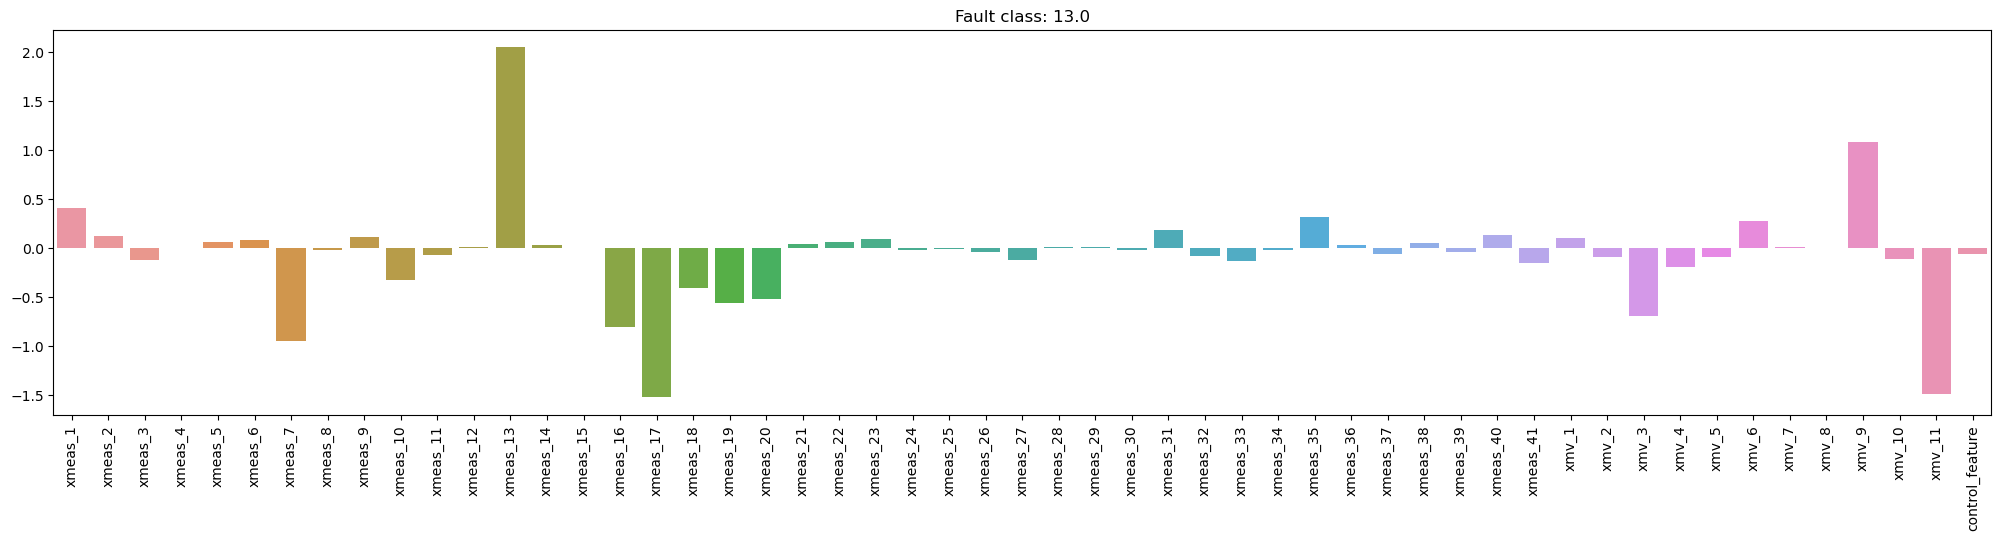

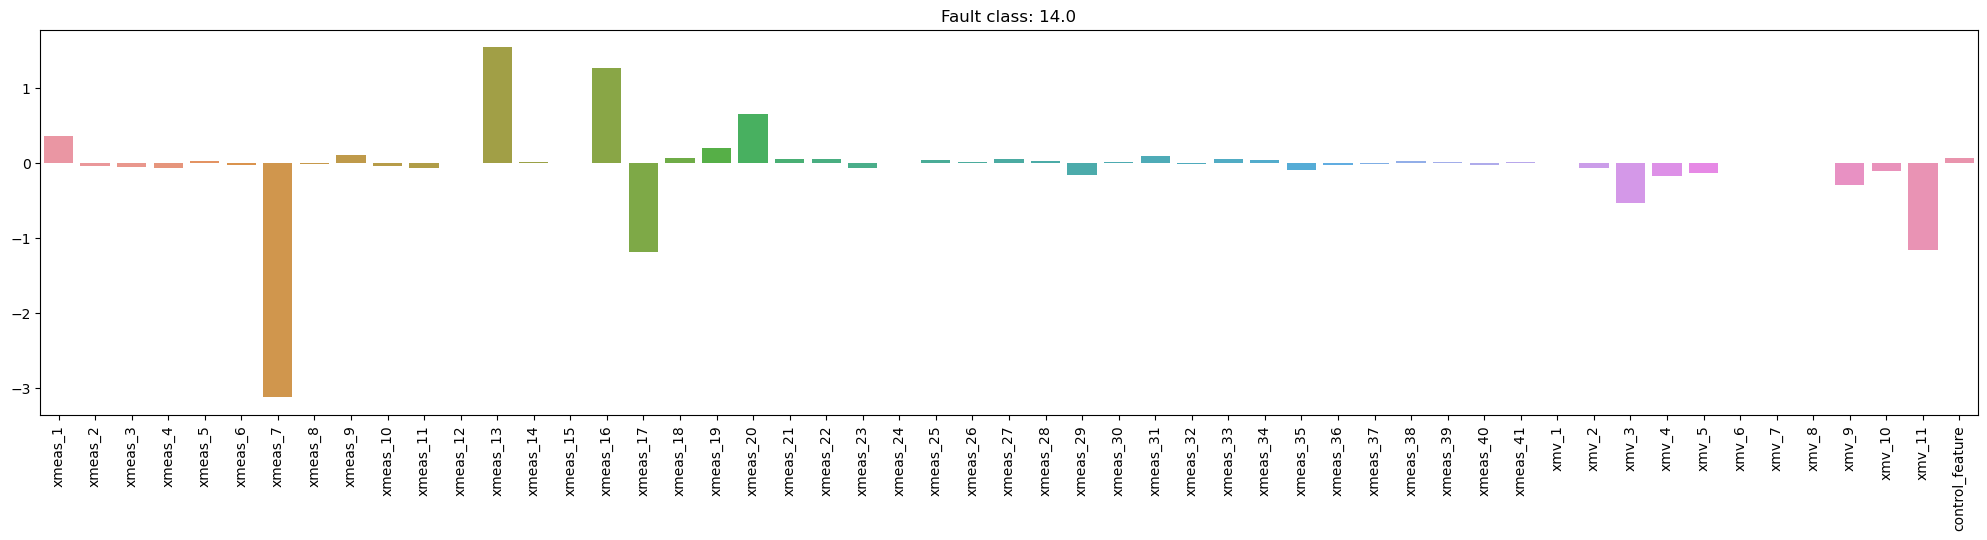

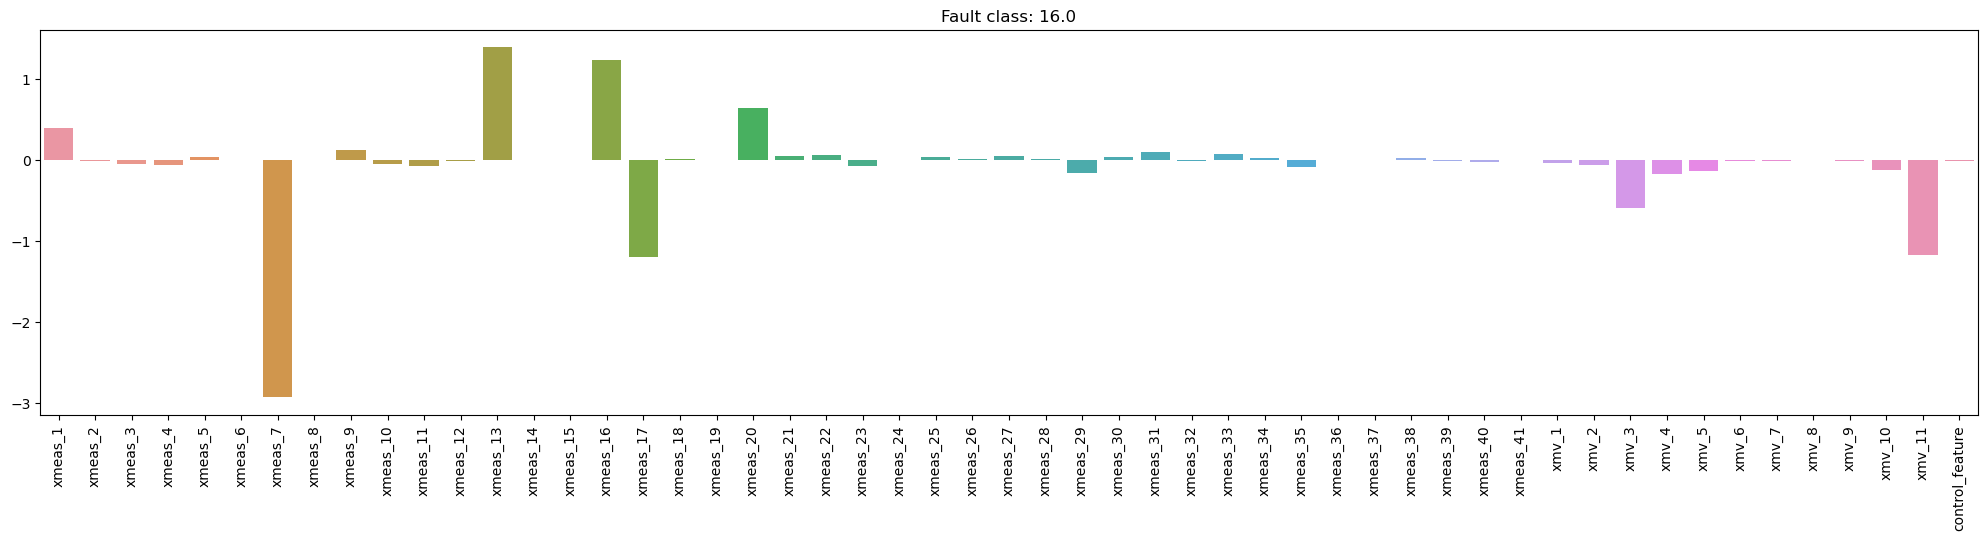

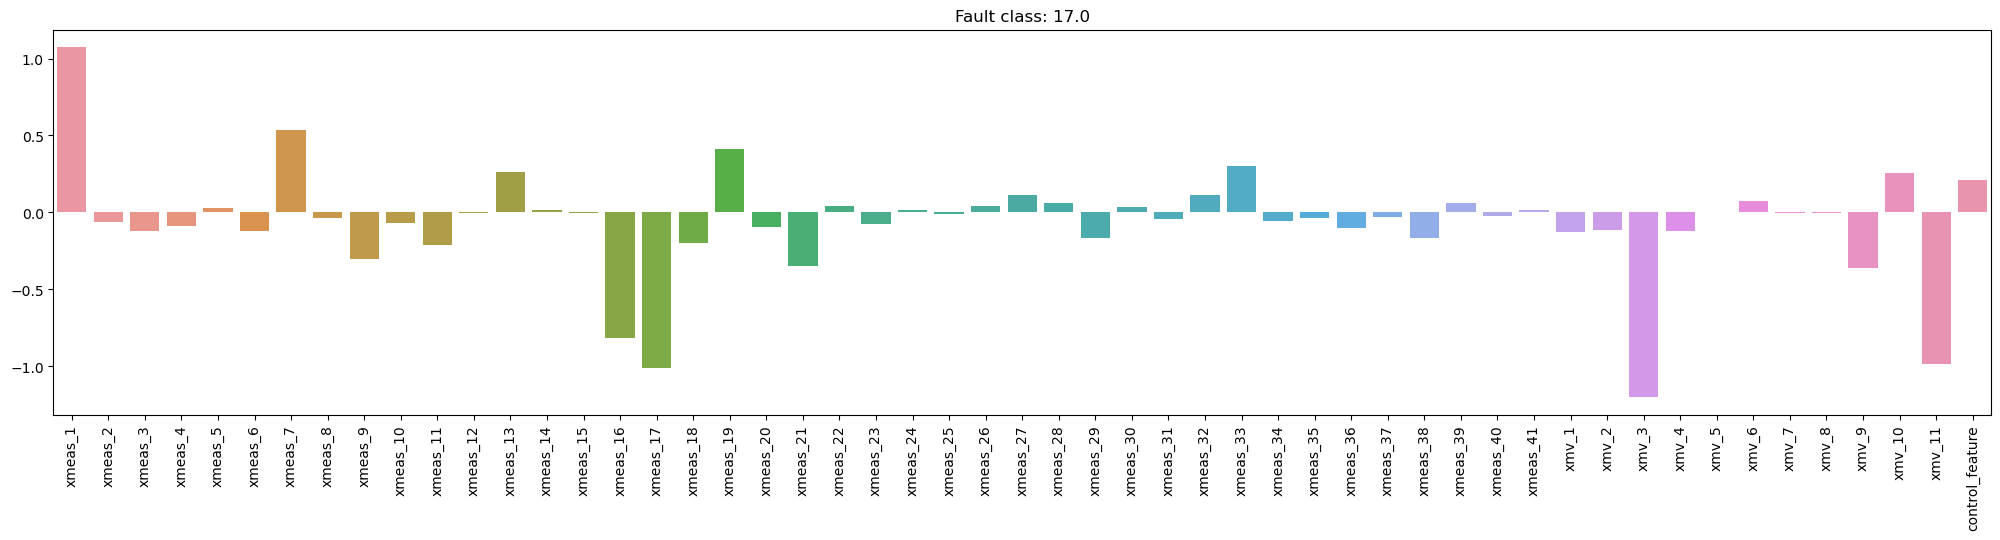

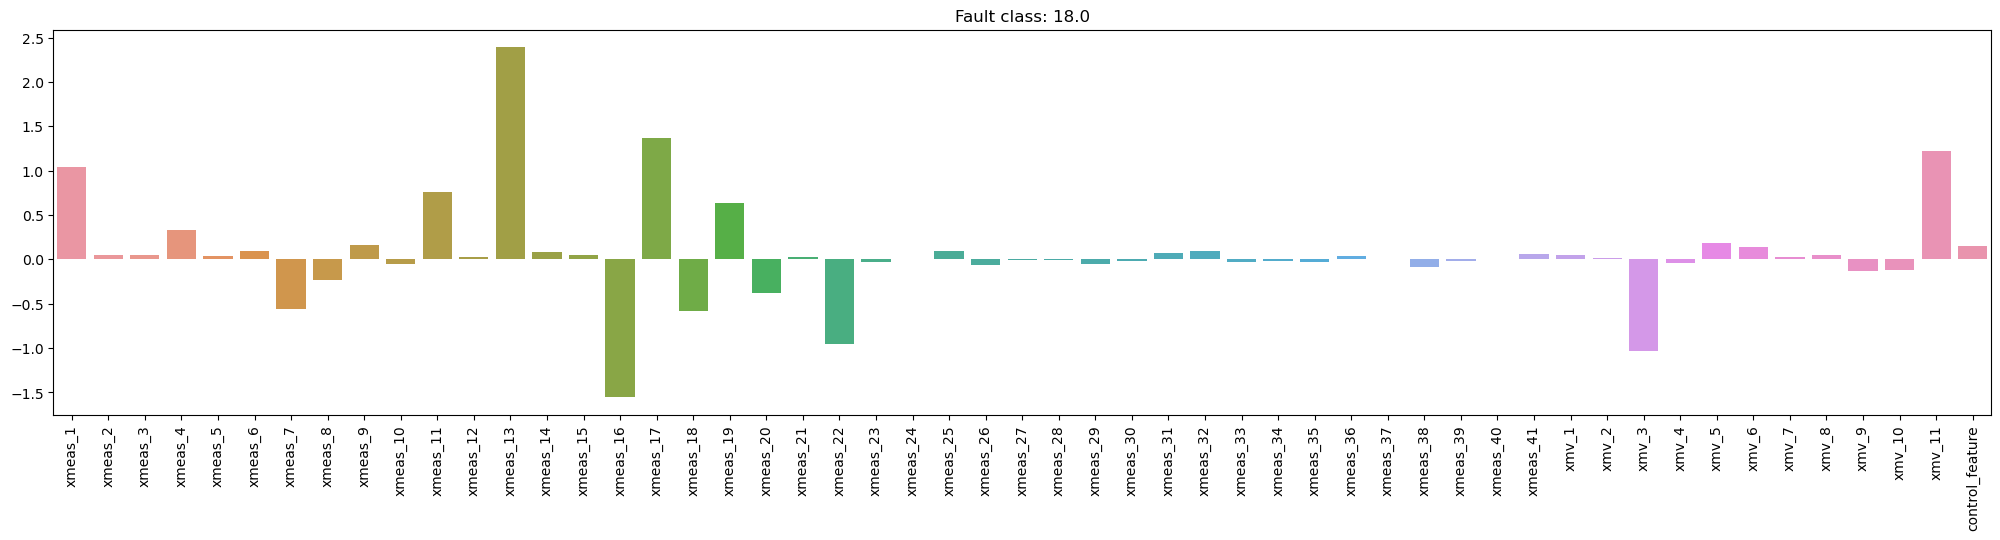

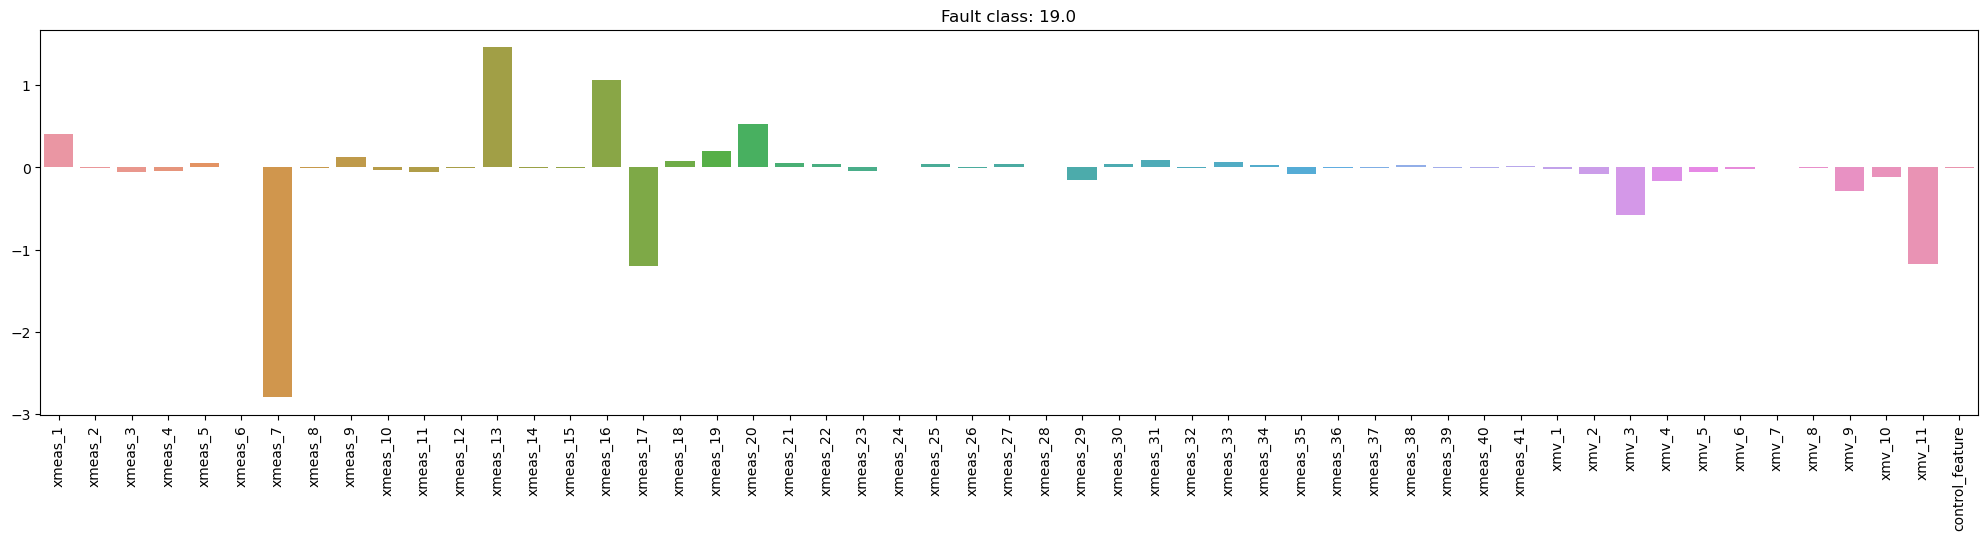

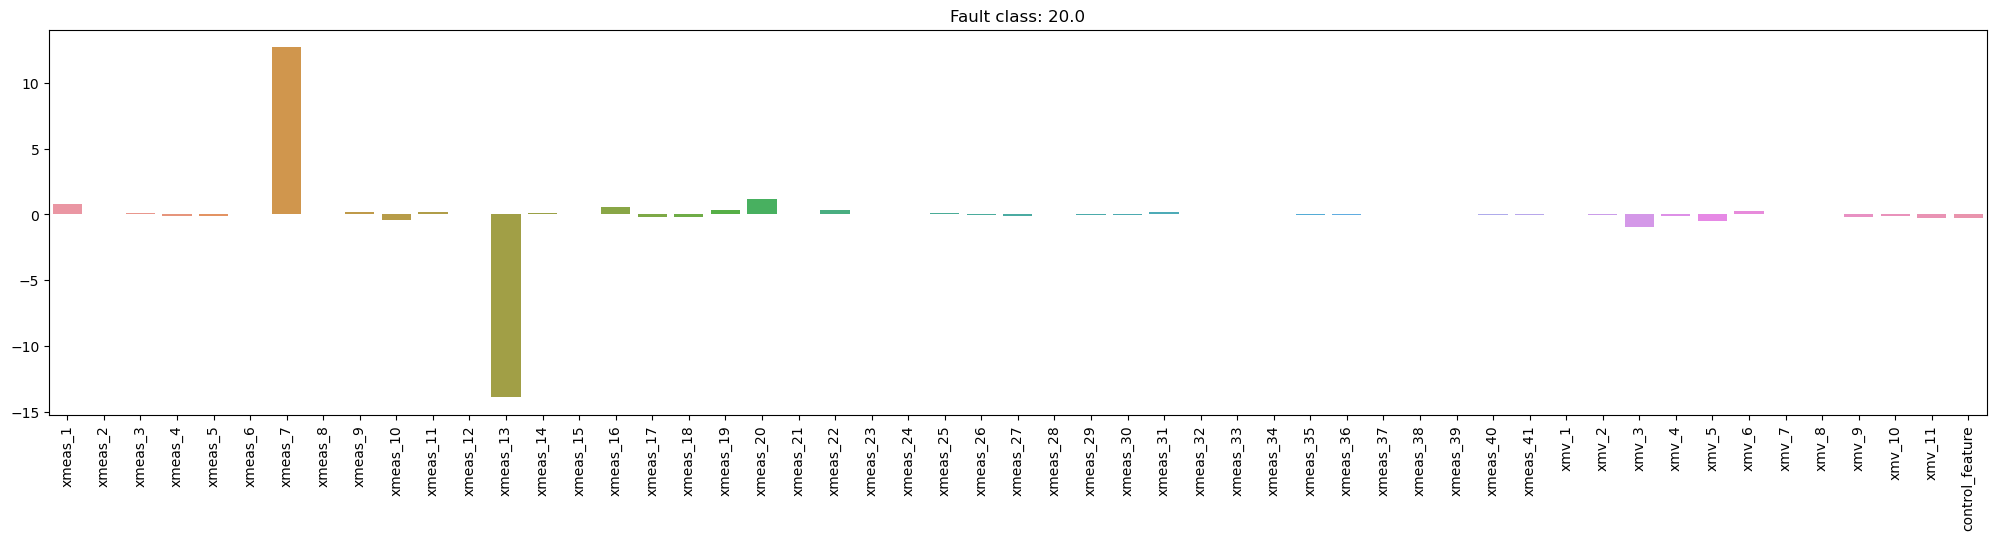

In [16]:

# Create barplots for each row of the DataFrame
for i in range(len(Coeff_df)):
    row_data = Coeff_df.iloc[i]
    plt.figure(figsize=(25, 5))
    sns.barplot(x=row_data.index, y=row_data.values)
    plt.title(f"Fault class: {LogRegCls.classes_[i]}")
    plt.xticks(rotation=90)
    plt.show()

# Combined feature Importance of all the Fault classes

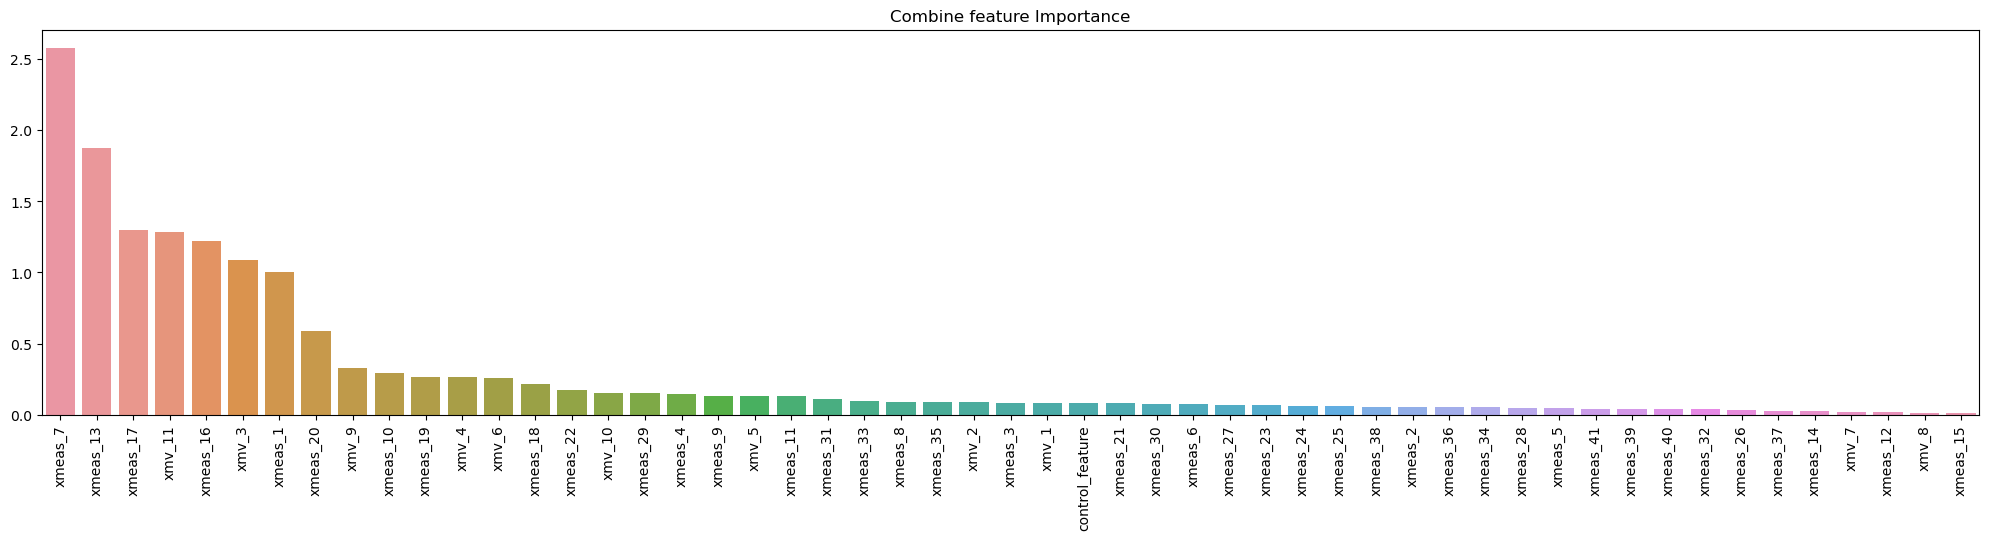

In [17]:
row_data = Coeff_df.abs().mean()
row_data = row_data.sort_values(ascending=False)

plt.figure(figsize=(25, 5))
sns.barplot(x=row_data.index, y=row_data.values)
plt.title(f"Combine feature Importance")
plt.xticks(rotation=90)
plt.show()

# Train The Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0,max_depth=50)

In [19]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [21]:
DT.score(x_train,y_train)

0.9250411184210526

In [22]:
DT.score(x_test,y_test)

0.7711074561403509

In [24]:
# get feature importances
importances = DT.feature_importances_
feature_name = np.array(reduced_data.columns[3:])
feature_name = np.append(feature_name,"control_feature")

# Create a DataFrame from the two arrays
feature_importance = pd.DataFrame({'feature_name': feature_name, 'importances': importances})

# Sort the DataFrame by importances in descending order
feature_importance = feature_importance.sort_values('importances', ascending=False)

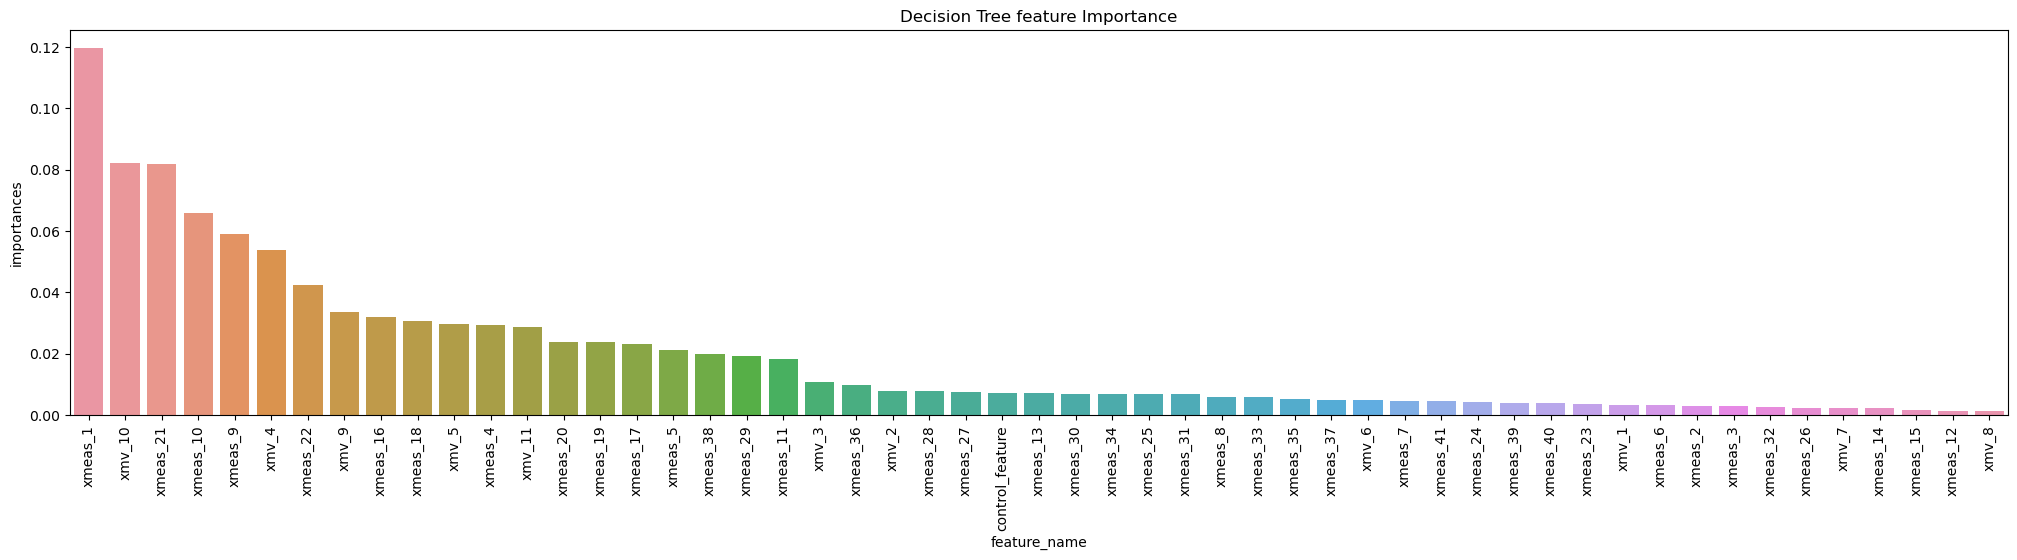

In [25]:
plt.figure(figsize=(25, 5))
sns.barplot(x=feature_importance.feature_name , y=feature_importance.importances)
plt.title(f"Decision Tree feature Importance")
plt.xticks(rotation=90)
plt.show()

# Visualize the Decision Tree as a bunch of If... Else rule structure

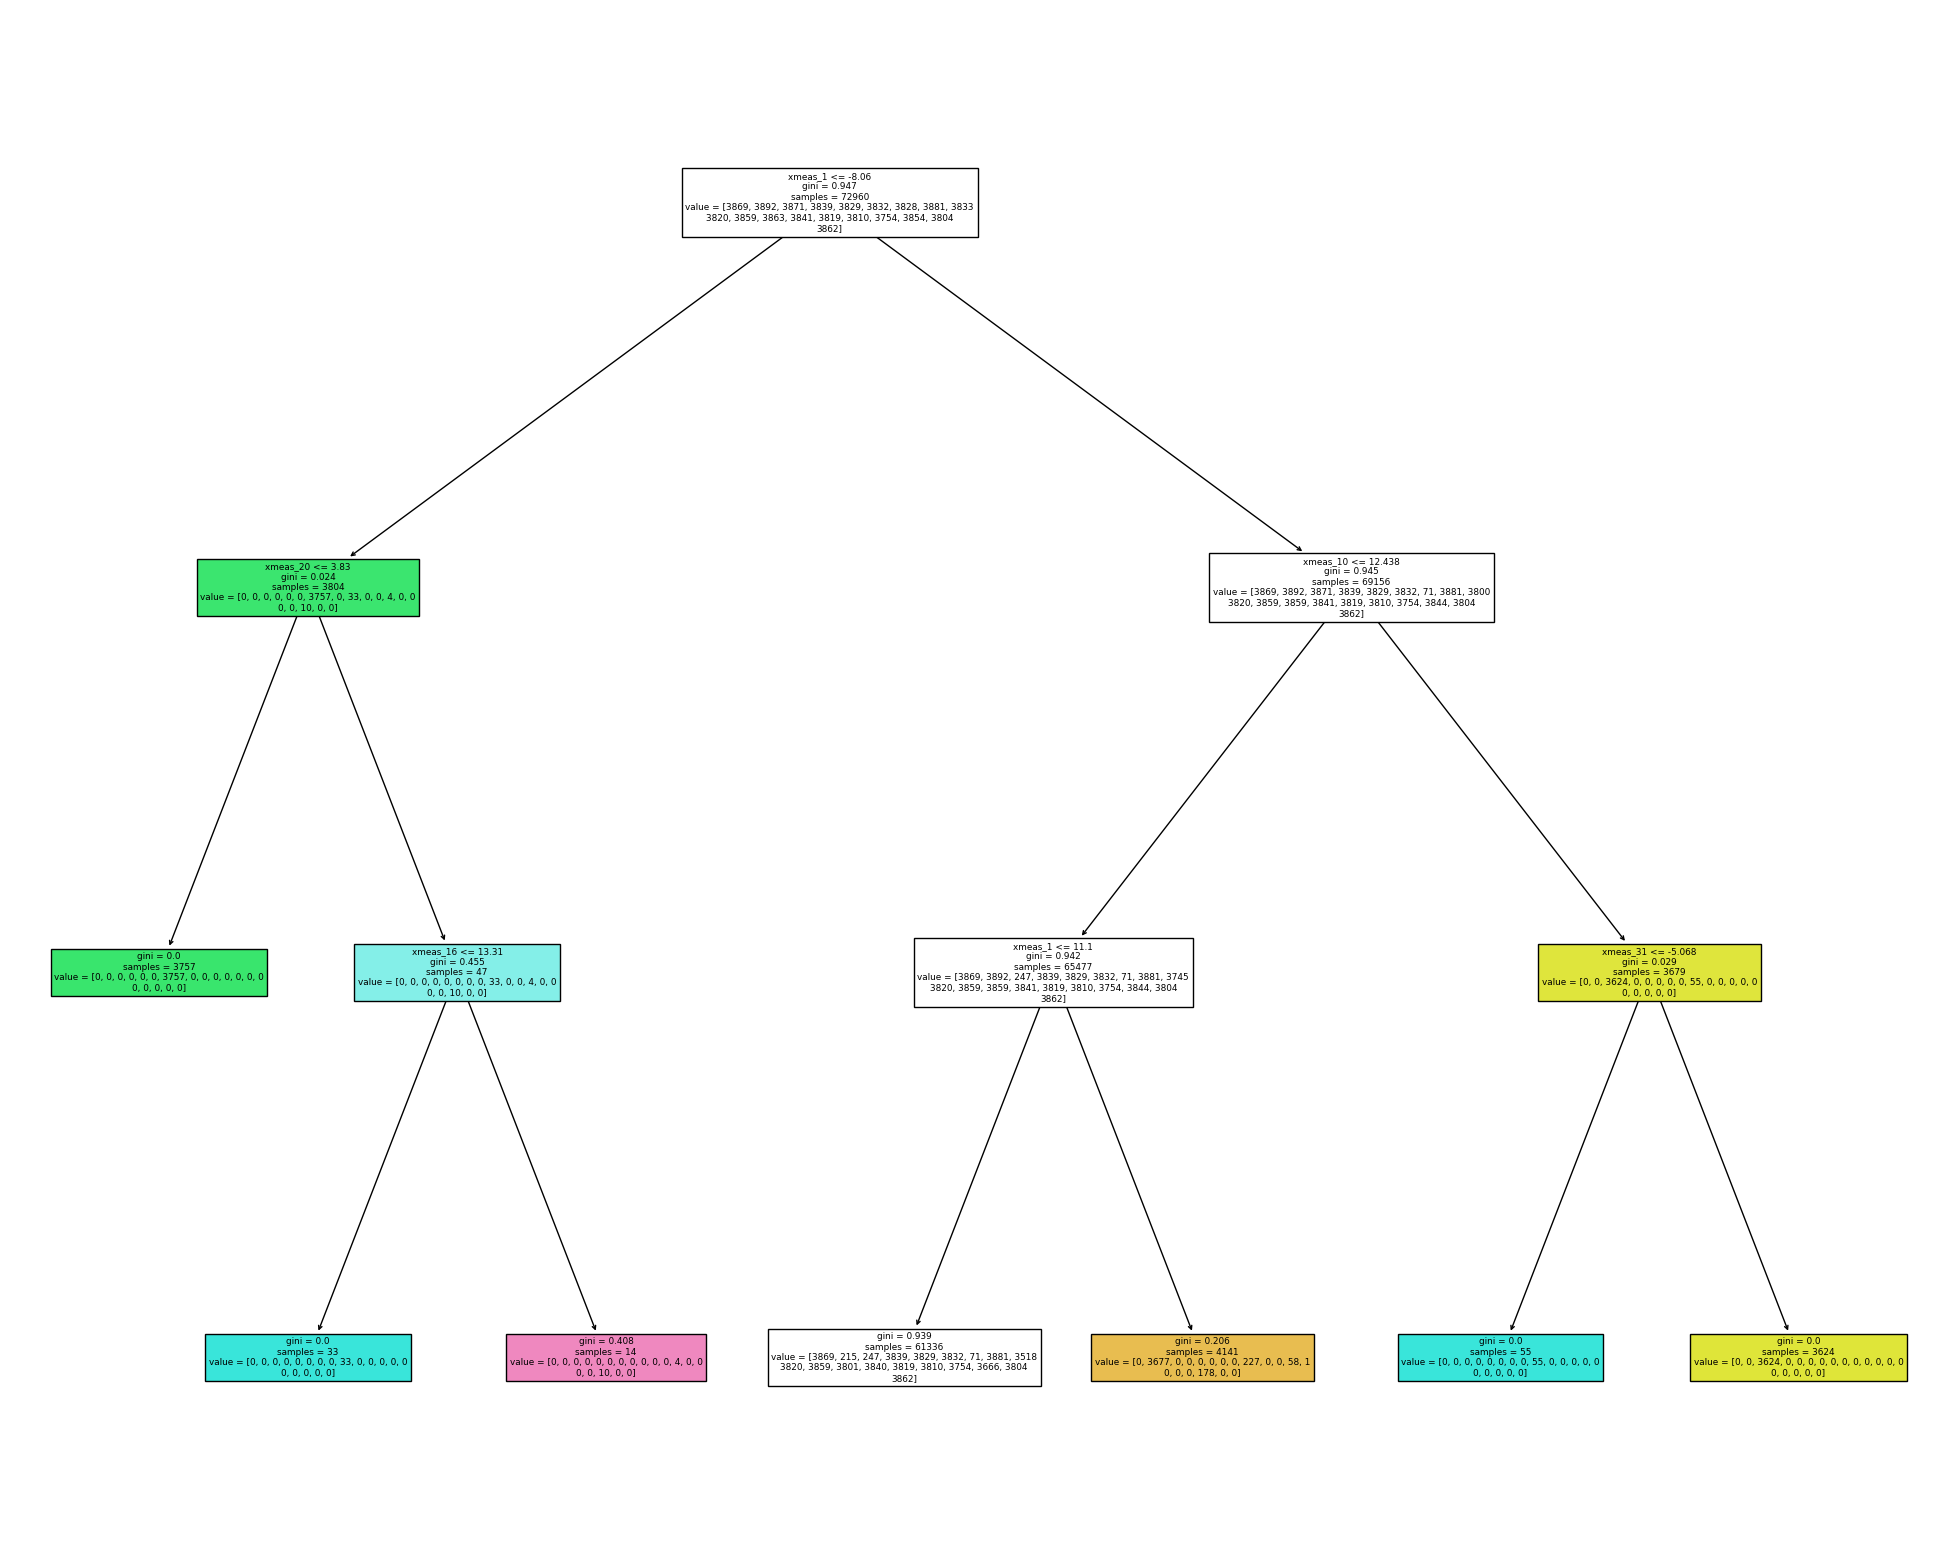

In [53]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=reduced_data.columns[3:],
                   filled=True)